# **Homework 1 - Machine Learning A.Y. 2023-2024**

Prof. Luca Iocchi

MSc in Artificial Intelligence and Robotics

La Sapienza, University of Rome

## Author

Ilaria De Sio - [desio.2064970@studenti.uniroma1.it](mailto:desio.2064970@studenti.uniroma1.it)

# 1) Dataset Initialization

## 1.1) Import needed libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from load_data import load_data #comment it if you use colab
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

print('Libraries imported')

Libraries imported


## 1.2) Load data (by drive or local)


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
%ls '/content/drive/My Drive/HW1_datasets'
PATH = "/content/drive/My Drive/HW1_datasets/"

 > In this part of code there are two sections to load the two different
datasets, the main difference is that they have different input space size d.



### Section for loading Dataset 1

In [ ]:
#insert PATH + to upload dataset from drive 
dataset = pd.read_csv("dataset1.csv")
Name = "Dataset 1"

### Section for loading Dataset 2

In [25]:
#insert PATH to upload dataset from drive 
dataset = pd.read_csv("dataset2.csv")
Name = "Dataset 2"

## Shape of the chosen Dataset

In [26]:
# I convert the strings in the 'x' column into number lists
dataset['x'] = dataset['x'].str.replace('[\[\]]', '', regex=True).str.split().apply(lambda x: [float(i) for i in x])

class_names = dataset['y'].unique()
class_names.sort()

# Numpy array of column x
X = np.array(dataset['x'].tolist())
Y = np.array(dataset['y'])

info_dict = {
    'Name of the Dataset': " "+Name,
    'Input shape': X.shape,
    'Output shape': dataset['y'].shape,
    'Number of attributes/features': X.shape[1],
    'Number of classes': len(class_names),
    'Class names': str(class_names),
    'Number of samples': X.shape[0]
}

for key, value in info_dict.items():
    print(f"{key}: {value}")

Name of the Dataset:  Dataset 2
Input shape: (50000, 1000)
Output shape: (50000,)
Number of attributes/features: 1000
Number of classes: 10
Class names: [0 1 2 3 4 5 6 7 8 9]
Number of samples: 50000


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       50000 non-null  object
 1   y       50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [28]:
dataset.head()

,x,y
0,"[0.0, 0.732924104, 0.0, 0.0, 0.0, 0.0, 0.56716...",6
1,"[0.0, 0.847136557, 1.06208432, 0.0, 0.0, 0.0, ...",9
2,"[0.0, 0.615394354, 0.786325812, 0.0, 0.0, 0.0,...",9
3,"[0.0, 0.0, 0.0, 0.270018995, 0.0, 0.0, 0.0, 0....",4
4,"[0.0, 0.2663214, 0.87441784, 0.0, 0.0, 0.08580...",1


# 2) Data Preprocessing


## 2.1) Data distribution

In [29]:
# Calculate basic statistics of the column x
stats = {
    'Mean': np.mean(X),
    'Standard Deviation': np.std(X),
    'Minimum': np.min(X),
    'Maximum': np.max(X),
    'Median': np.median(X),
    '25th Percentile': np.percentile(X, 25),
    '75th Percentile': np.percentile(X, 75),
}

stats

{'Mean': 0.2840021804488242,
 'Standard Deviation': 0.44998371106731605,
 'Minimum': 0.0,
 'Maximum': 5.39214611,
 'Median': 0.0,
 '25th Percentile': 0.0,
 '75th Percentile': 0.448782846}

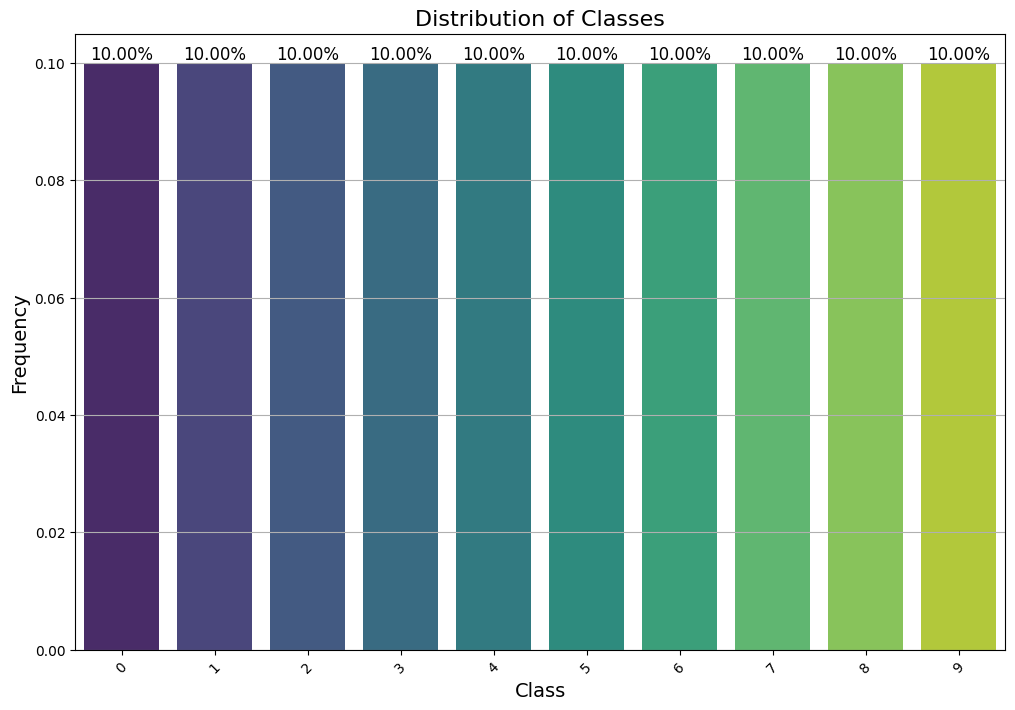

In [30]:
# Calculation of class distribution
class_distribution = dataset['y'].value_counts(normalize=True).sort_index()

# Bar Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")

plt.title("Distribution of Classes", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Adding text on each bar to show percentage
for index, value in enumerate(class_distribution.values):
    plt.text(index, value, f"{value:.2%}", ha='center', va='bottom', fontsize=12)

# Some other settings
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Y is perfectly uniform: each class represents exactly 10% of the dataset. This indicates that the dataset is balanced with respect to classes.

In [31]:
features_df = pd.DataFrame(dataset['x'].tolist(), columns=[f'feature_{i}' for i in range(len(dataset['x'][0]))])

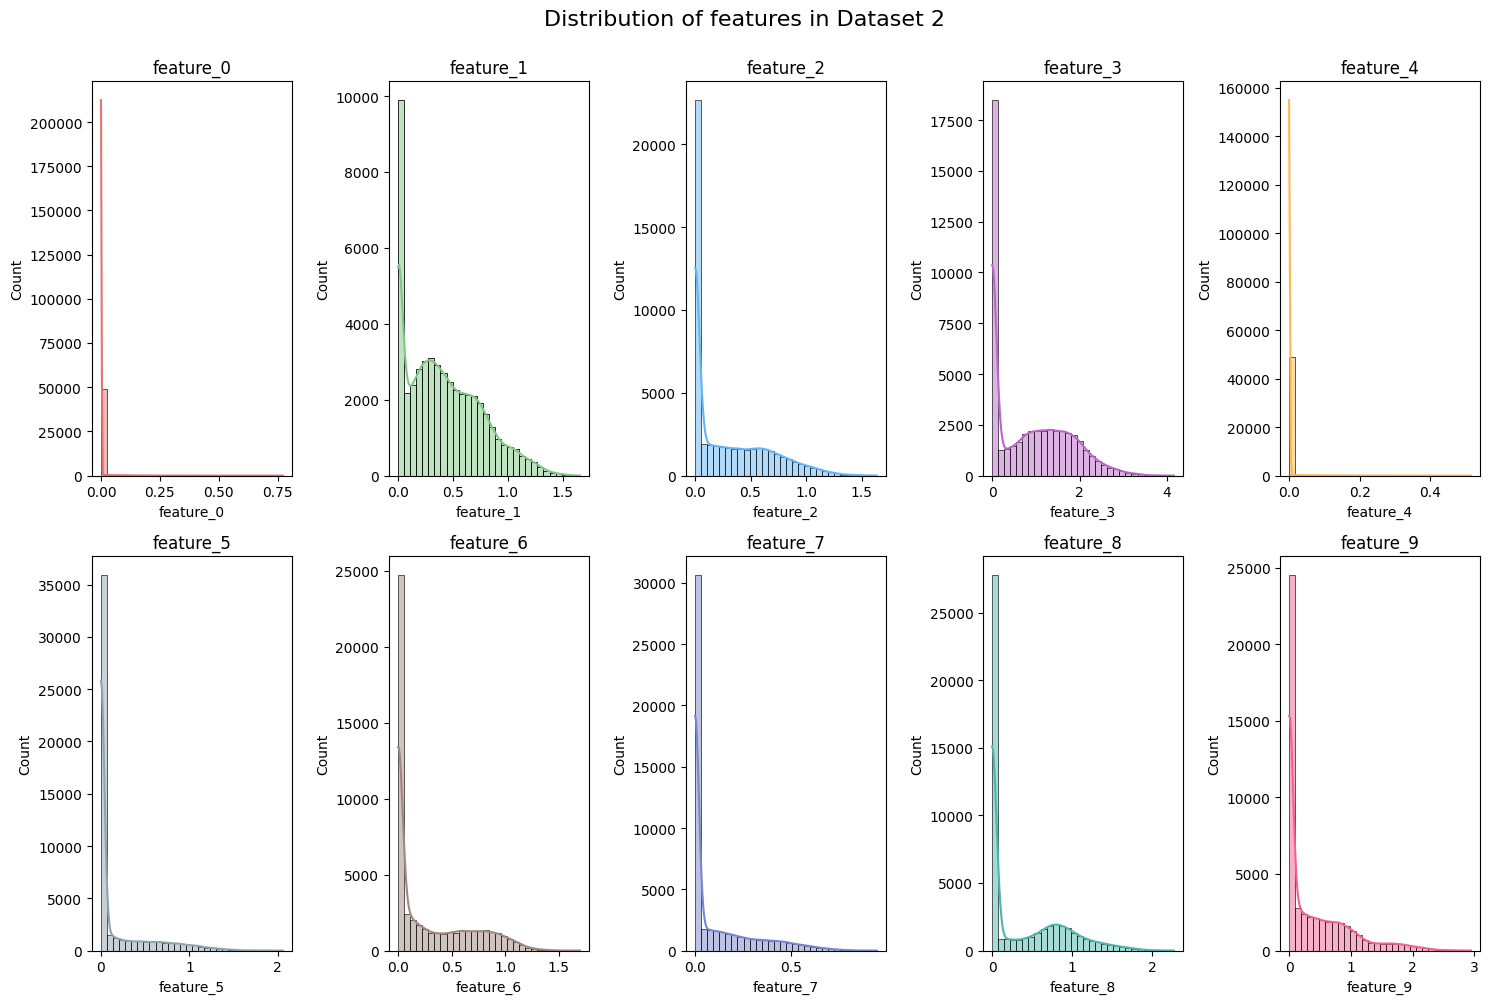

In [32]:
# Select the top 10 features
selected_features = features_df.columns[:10]
colors = ['#e57373', '#81c784', '#64b5f6', '#ba68c8', '#ffb74d', '#90a4ae', '#a1887f', '#7986cb', '#4db6ac', '#f06292']

plt.figure(figsize=(15, 10))

# Histogram for each feature
for idx, (feature, color) in enumerate(zip(selected_features, colors), 1):
    plt.subplot(2, 5, idx)
    sns.histplot(features_df[feature], bins=30, kde=True, color=color)  # Kernel Density Estimate set to true to highlight
    plt.title(f'{feature}')
    plt.tight_layout()
    plt.suptitle("Distribution of features in "+ Name, fontsize=16, y=1.00)

plt.show()

A large portion of values in the features is concentrated around 0, as illustrated by the peaks at that value in different distributions.

## 2.2) Split Data

In [33]:
random_state = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=random_state)

# Check
(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((33500, 1000), (16500, 1000), (33500,), (16500,))

In [34]:
sample_index = np.random.randint(0, len(X_train))
X_sample, Y_sample = X_train[sample_index], Y_train[sample_index]
print("Example random training sample: \n")
X_sample, Y_sample

Example random training sample: 



(array([0.        , 0.22490692, 0.        , 1.0779527 , 0.        ,
        0.        , 0.3874591 , 0.27703276, 0.        , 0.00565744,
        0.22776748, 0.04437674, 0.        , 0.21554738, 0.        ,
        0.02950684, 0.        , 0.21488622, 1.048089  , 0.41325358,
        0.06408741, 0.28285155, 0.25292876, 0.16218632, 0.44509372,
        0.        , 0.04580955, 0.5933488 , 0.        , 0.2638249 ,
        0.        , 0.10388383, 0.4533617 , 0.        , 0.4061476 ,
        0.03362195, 0.79329985, 0.20206177, 0.06628057, 0.5270826 ,
        0.        , 0.04053305, 0.16478533, 0.29054227, 0.3360407 ,
        0.7424617 , 0.47393066, 0.87322235, 0.2433483 , 0.        ,
        0.        , 0.        , 0.12684348, 0.41530702, 0.1315738 ,
        0.        , 0.        , 0.        , 0.        , 0.2174232 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.7854808 , 0.00598284, 0.        , 0.24717093,
        0.        , 0.24765435, 0.17938292, 0.09

## 2.4) Models Choice

### All models in a single cell

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=3000),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(decision_function_shape='ovo'),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

### Logistic Regression:

In [44]:
model = LogisticRegression(max_iter=4000)

### K-Nearest Neighbors (KNN):

In [35]:
model = KNeighborsClassifier()

### Support Vector Machines (SVM):

In [ ]:
model = SVC()

### Decision Trees:

In [ ]:
model = DecisionTreeClassifier()

### Random Forest

In [ ]:
model = RandomForestClassifier()

## 2.5) Feature Scaling

In this part of the code there are two sections for choosing whether to use standardization or normalization, to do a comparative analysis on how much this may impact performance

### Standard Scaler (Standardization)

In [36]:
# Apply Z-score standardization
Scaler_name = "Std"

scaler = StandardScaler()

### Min-Max Scaler (Normalization)

In [45]:
# Apply Min-Max Normalization
Scaler_name = "Norm"

scaler = MinMaxScaler()

# 3) Model Training and Testing Phase
I decided to divide the part on models into two main parts and then do a comparative analysis of the two. 

The first part ( the one below ) concerns the use of the models without the use of any optimization hyperparameters, so only with the default parameters and their performance will be analyzed. 


In the second part, on the other hand, different hyperparameters will be used to see which one performs better and compare them.

## 3.1) Default Models Performance

In [37]:
if Name == "Dataset 1":  cmcolor = "Blues"
else: cmcolor = "Greens"

>Code for multiple models, skip it if you want to run a single model

In [ ]:
# Assuming 'models' is a dictionary of your models and 'scaler' is defined
pipelines = {name: make_pipeline(scaler, model) for name, model in models.items()}

# Dictionary to store training times
training_times = {}

# Classification report with different metrics for each model
for name, pipeline in pipelines.items():
    start_time = time.time()  # Start timing the training

    pipeline.fit(X_train, Y_train)
    predictions = pipeline.predict(X_test)

    training_time = time.time() - start_time  # Final computational time
    training_times[name] = training_time  # Store the training time

    print(f"Results of {name}:")
    print(f"Training Time: {training_time:.4f} seconds")
    print(classification_report(Y_test, predictions, digits=3))

    # Confusion matrix
    cm = confusion_matrix(Y_test, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmcolor)
    plt.title(f"Confusion Matrix of {name} with {scaler}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

>Code for a chosen single model

Results of LogisticRegression(max_iter=4000):
Training Time: 99.3563 seconds
              precision    recall  f1-score   support

           0      0.982     0.991     0.986      1628
           1      0.989     0.986     0.988      1614
           2      0.978     0.960     0.969      1645
           3      0.927     0.920     0.924      1693
           4      0.961     0.978     0.969      1582
           5      0.929     0.927     0.928      1694
           6      0.986     0.987     0.987      1599
           7      0.978     0.982     0.980      1662
           8      0.994     0.995     0.994      1692
           9      0.987     0.986     0.986      1691

    accuracy                          0.971     16500
   macro avg      0.971     0.971     0.971     16500
weighted avg      0.971     0.971     0.971     16500



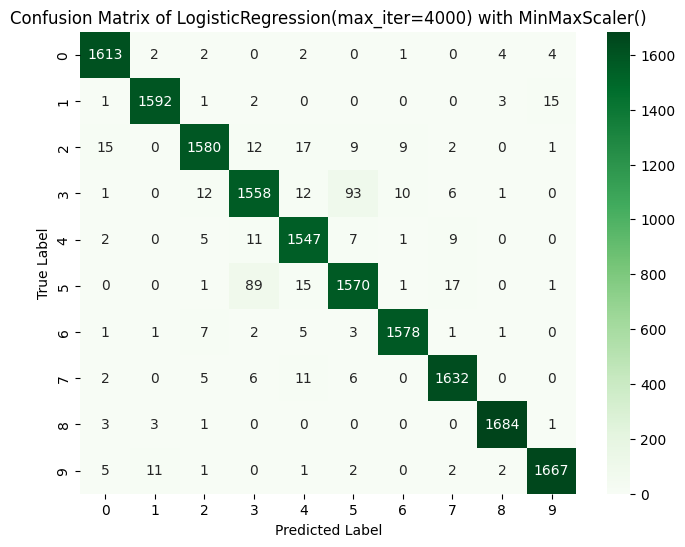

In [46]:
pipe = make_pipeline(scaler, model)
start_time = time.time()
pipe.fit(X_train, Y_train)
training_time = time.time() - start_time
y_pred = pipe.predict(X_test)

print(f"Results of {model}:")
print(f"Training Time: {training_time:.4f} seconds")
print(classification_report(Y_test, y_pred,digits=3))

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmcolor)
plt.title(f"Confusion Matrix of {model} with {scaler}")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 3.2) Models with Cross-Validation

In [47]:
param_grid = {
    # Parameters for Logistic Regression:
    # 'logisticregression__C' : Inverse of regularization strength; 
    'LogisticRegression': {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10] # add 100]
    },

    # Parameters for K-Nearest Neighbors Classifier:
    # 'kneighborsclassifier__n_neighbors': Number of neighbors to use;
    # 'kneighborsclassifier__weights': Weight function used;
    # 'kneighborsclassifier__metric': Metric used for the distance computation;
    'KNeighborsClassifier': {
        'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__metric': ['euclidean', 'manhattan']
    },

    # Parameters for Support Vector Classifier (SVC):
    # 'svc__C': Regularization parameter. The strength of the regularization is inversely proportional to C;
    # 'svc__gamma': Kernel coefficient for the followings kernels;
    # 'svc__kernel': Specifies the kernel type to be used in the algorithm;
    'SVC': {
        'svc__C': [0.1, 1, 10],
        'svc__gamma': [0.01, 0.1, 1],
        'svc__kernel': ['linear'] #removed rbf for dataset 2
    },

    # Parameters for Decision Tree Classifier:
    # 'decisiontreeclassifier__max_depth': Maximum depth of the tree;
    # 'decisiontreeclassifier__min_samples_split': Minimum number of samples required to split an internal node;
    # 'decisiontreeclassifier__min_samples_leaf': Minimum number of samples required to be at a leaf node;
    'DecisionTreeClassifier': {
        'decisiontreeclassifier__max_depth': [10, 20],
        'decisiontreeclassifier__min_samples_split': [2, 5, 10],
        'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    },

    # Parameters for Random Forest Classifier:
    # 'randomforestclassifier__n_estimators': Number of trees in the forest;
    # 'randomforestclassifier__max_depth': Maximum depth of the created trees;
    # 'randomforestclassifier__min_samples_split': Minimum number of samples required to split an internal node;
    # 'randomforestclassifier__min_samples_leaf': Minimum number of samples required to be at a leaf node;
    'RandomForestClassifier': {
        'randomforestclassifier__n_estimators': [100, 200],
        'randomforestclassifier__max_depth': [10, 20],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    }
}

>Lines for tuning multiple models 

In [ ]:
best_models = {}
# Cross-validation and analysis of confusion matrices
for name, pipeline in pipelines.items():
    if name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='accuracy', verbose=3)
        grid_search.fit(X_train, Y_train)

        print(f"Results for {name} with GridSearchCV with {scaler}:")
        print(f"Best set of parameters: {grid_search.best_params_}")
        print(f"Best score (Accuracy): {grid_search.best_score_:.3f}")

        best_models[name] = grid_search.best_estimator_

        # Evaluation on the test set
        test_accuracy = best_models[name].score(X_test, Y_test)

        print(f"Accuracy on test set: {test_accuracy}")

        # Predictions for the test set
        y_pred = best_models[name].predict(X_test)

        # Classification report
        print(f"Classification Report for {name} with best parameters:")
        print(classification_report(Y_test, y_pred, digits=3))

        # Confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges')
        plt.title(f"Confusion Matrix for {name}")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

>Lines of code for tuning a single model

In [48]:
model_name = model.__class__.__name__
model_name

'LogisticRegression'

In [49]:
if model_name in param_grid:
    grid_params = param_grid[model_name]
    grid_search = GridSearchCV(pipe, grid_params, cv=5, scoring='accuracy', verbose=3)
    grid_search.fit(X_train, Y_train)

    print(f"Results for {model_name} with GridSearchCV with {scaler}:")
    print(f"Best set of parameters: {grid_search.best_params_}")
    print(f"Best score (Accuracy): {grid_search.best_score_:.3f}")

    best_model = grid_search.best_estimator_
    best_model_pred = best_model.predict(X_test)

    print(classification_report(Y_test, best_model_pred, digits=3))
    
    cm = confusion_matrix(Y_test, best_model_pred)

    plt.figure(figsize=(10,7))
    plt.title(f"Confusion Matrix for {model}:")
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
else:
    print(f"No parameter grid defined for {model_name}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .......logisticregression__C=0.001;, score=0.978 total time=   9.9s
[CV 2/5] END .......logisticregression__C=0.001;, score=0.972 total time=   6.8s
[CV 3/5] END .......logisticregression__C=0.001;, score=0.974 total time=   6.1s
[CV 4/5] END .......logisticregression__C=0.001;, score=0.974 total time=   5.3s
[CV 5/5] END .......logisticregression__C=0.001;, score=0.973 total time=   5.7s
[CV 1/5] END ........logisticregression__C=0.01;, score=0.977 total time=  10.2s
[CV 2/5] END ........logisticregression__C=0.01;, score=0.973 total time=  12.8s
[CV 3/5] END ........logisticregression__C=0.01;, score=0.973 total time=  14.1s
[CV 4/5] END ........logisticregression__C=0.01;, score=0.974 total time=  10.4s
[CV 5/5] END ........logisticregression__C=0.01;, score=0.973 total time=  12.3s
[CV 1/5] END .........logisticregression__C=0.1;, score=0.977 total time=  26.9s
[CV 2/5] END .........logisticregression__C=0.1;,

## 3.3) Evaluation of the models
>The evaluation of the real score of the model is on the entire dataset

> (Respectively the code for multiple models and single model)

In [42]:
cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)

In [ ]:
for name, model in best_models.items():
    scores = cross_val_score(model, X, Y, cv=cv)
    print(f"Cross-validated accuracy on entire dataset for {name}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

In [43]:
score = cross_val_score(best_model, X, Y, cv=cv)
print(f"Cross-validated accuracy on entire dataset for {model_name}: {score.mean():.3f} (+/- {score.std() * 2:.3f})")

Cross-validated accuracy on entire dataset for KNeighborsClassifier: 0.971 (+/- 0.003)


# 4) Training Time Analysis

In [ ]:
pipelines = {name: make_pipeline(StandardScaler(), model) for name, model in models.items()}

# Number of iterations for training
num_iterations = 20

training_times_series = {name: [] for name in models}

# Record times
for iteration in range(num_iterations):
    for name, pipeline in pipelines.items():
        start_time = time.time()
        pipeline.fit(X_train, Y_train)  
        training_time = time.time() - start_time
        training_times_series[name].append(training_time)

# Stats for the legend
training_stats = {name: {'mean': np.mean(times), 'std': np.std(times)} for name, times in training_times_series.items()}

min_time = min(min(times) for times in training_times_series.values())
max_time = max(max(times) for times in training_times_series.values())

print(f"Minumum Training Time: {min_time:2f} seconds")
print(f"Maximum Training Time: {max_time:2f} seconds")


In [ ]:
#Define number of ticks 
num_ticks = int(np.ceil(np.log10(max_time)) - np.floor(np.log10(min_time)) + 1)
y_ticks = np.logspace(start=np.floor(np.log10(min_time)), stop=np.ceil(np.log10(max_time)), num=num_ticks)
y_tick_labels = [f"{tick:.2f}" if tick < 1 else str(int(tick)) for tick in y_ticks]

plt.figure(figsize=(12, 8))

# Plot Creation
for name, times in training_times_series.items():
    stat = training_stats[name]
    plt.plot(range(1, num_iterations + 1), times, label=f"{name} (mean: {stat['mean']:.2f}s, std: {stat['std']:.2f}s)")

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Training Time (seconds)', fontsize=14)
plt.title(f'Training Time for {num_iterations} Iterations for each model', fontsize=16)
plt.legend()
plt.xticks(range(1, num_iterations + 1))
plt.yscale('log')
plt.yticks(y_ticks, y_tick_labels)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 5) Blind Tests

In [ ]:
if Name == "Dataset 1":  blind_file = "blind_test1.csv"
else: blind_file = "blind_test2.csv"

In [ ]:
X_blind,Y_blind = load_data(blind_file)

print(X_blind)

y_blind_pred = best_model.predict(X_blind)
print(best_model)
print(y_blind_pred)

pred_df = pd.DataFrame(y_blind_pred)

If is the dataset 1 run the first cell, otherwise the second

In [ ]:
pred_df.to_csv('d1_2064970.csv',index=False)
print("File successfully saved")

In [ ]:
pred_df.to_csv('d2_2064970.csv',index=False)
print("File successfully saved")